## Advanced Sorting Algorithms: QuickSort and Merge Sort

In [8]:
## Define some function useful for testing
import random

## generate an array of n random integers up to 10000
def get_random_array(n):
    return [random.randint(0, 10000) for _ in range(n)]

def test_sorting_algorithm(algorithm):
    for _ in range(100):
        A = get_random_array(random.randint(0, 1000))
        A_sorted = algorithm(A)
        assert A_sorted == sorted(A), "FAIL!"
        
def get_h(A):
    return len(A)-1
    
# testing testing function
test_sorting_algorithm(sorted)

## QuickSort 

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done **in-place**, requiring small additional amounts of memory to perform the sorting.

Thus, the most important part of QuickSort is its partition algorithm. 
Given a pivot element, the partition algorithm splits a subarray into three parts.

- Elements that are smaller than or equal to the pivot
- The pivot
- Elements that are greater than or equal to the pivot

The algorithm works in-place, i.e., it performs the partition within the subarray itself without any extra space.

![alt text](partition_algorithm.png "Partition: pseudocode")

![alt text](partition_figure.png "Figure")

![alt text](partition_running_example.png "Title")

### Exercise: Binary Vector
You are given a binary vector, i.e., each element is either 0 or 1. Implements an easy variant of partition to sort the vector.

In [51]:
import random 

binary = [random.randint(0,1) for _ in range(20)]
print(binary)

[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]


In [52]:
## Your implementation goes here

def binary_sort(A):
    left = 0
    right = len(A) - 1

    while left < right:
        while A[left] == 0 and left < right:
            left += 1
        while A[right] == 1 and left < right:
            right -= 1

        if left < right:
            A[left], A[right] = A[right], A[left]
            left += 1
            right -= 1

    return A

binary_sort(binary)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

### Exercise: QuickSort
Below an implementation of QuickSort. 

In this exercise you have to:
- Write detailed comments to describe crucial parts of the code below (to prove you have understand it)
- Implement a random selection of the pivot element

In [8]:
def partition(A, low = 0, high = None):

    if high is None:
        high = len(A) - 1
    
    pivot = random.randint(low, high) ## add here random selection of the pivot
    A[pivot], A[high] = A[high], A[pivot] ## swapping the randomly selected pivot to the last position of the array
    
    pivot = [high] ## setting back the pivot to the last position since we already swapped the chosen one
    i = low -1  # setting index 1 position outside the array
    
    for j in range(low, high): # traversing the partition(s) with a for loop
        if A[j] <= pivot: # executing condition "<="(traversing index against pivot)
            i = i+1 # if the condition holds, i moves forward by 1 every time, to track the index position
                    # of the < than pivot p|art of the array (-1 cause it was none till the firs condition check)
            A[i], A[j] = A[j], A[i] #-u swapping the position of the element < than pivot with 
                                    # i (index of green part), if it's already smaller thant it just update the
                                    # the index to match the < than part of array
                                    
    A[i+1], A[high] = A[high], A[i+1] # moving to the last part of the array the last bigger than the pivot number to get the array properly partitioned
    return i+1 #returning the index 

In [9]:
def quickSort_rec(A, low, high): # recursive implementation of the partition alorithm 
    if low < high: # checks if the lower index is less thant the higher one if true there are things to be sorted still
        pi = partition(A, low, high) 
        quickSort_rec(A, low, pi-1) # recursive call on one half
        quickSort_rec(A, pi+1, high) # recursive call on the other half till the array is sorted

In [10]:
def quickSort(A):
    B = A[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(B, low = 0, high = len(B)-1) 
    return B

In [6]:
test_sorting_algorithm(quickSort)

In [11]:
quickSort([2, 1, 4, 3])

[4, 3, 2, 1]

## Let's do some experiments

Is QuickSort faster than InsertionSort and SelectionSort in practice?

In [27]:
def insertionSort(coll):
    A = list(coll)
    for i in range(1, len(A)):
        curr = A[i]
        j = i-1
        while j >= 0 and curr < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = curr
    return A

In [28]:
def selectionSort(coll):
    A = list(coll)
    for i in range(len(A)): 
        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j 

        # Swap the found minimum element with  
        # the first element         
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

In [29]:
A = get_random_array(10000)

In [30]:
%timeit quickSort(A)

24.3 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit insertionSort(A)

2.89 s ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit selectionSort(A)

2.69 s ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## More than     ~20x faster with arrays of length    10 000. IS takes 3.4 secs
### More than   ~200x faster with arrays of length   100 000. IS takes 5.6 mins
### More than ~2 000x faster with arrays of length 1 000 000. IS takes 9.4 hours. QS takes 16.2 secs.
### More than ~20 000x faster with arrays of length 10 000 000. IS takes 39,3 days. QS takes 5.6 mins.
### More than ~200 000x faster with arrays of length 100 000 000. IS takes 10,8 years. QS take 56 mins.

Try to run the experiments with an array of 1.000.000. **Run insertion sort and selection sort just before you go to sleep.** 

### Let's see how time changes by increasing the length of the array

In [33]:
qs_t = []
is_t = []
ss_t = []

lens = [2**i for i in range(1, 11)]

for n in lens:
    A = get_random_array(n)
    result = %timeit -o quickSort(A)
    qs_t.append( result.best )
    result = %timeit -o insertionSort(A)
    is_t.append( result.best )
    result = %timeit -o selectionSort(A)
    ss_t.append( result.best )

1.64 µs ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
435 ns ± 1.51 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
767 ns ± 3.04 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
3.67 µs ± 43.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
858 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.6 µs ± 23.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
8.24 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.94 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.69 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
18.4 µs ± 390 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.26 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10 µs ± 18 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
38.8 µs ± 610 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
24.5 µs ± 278 ns

In [34]:
import matplotlib.pyplot as plt # standard way to import

%matplotlib inline 
#any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic

plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')

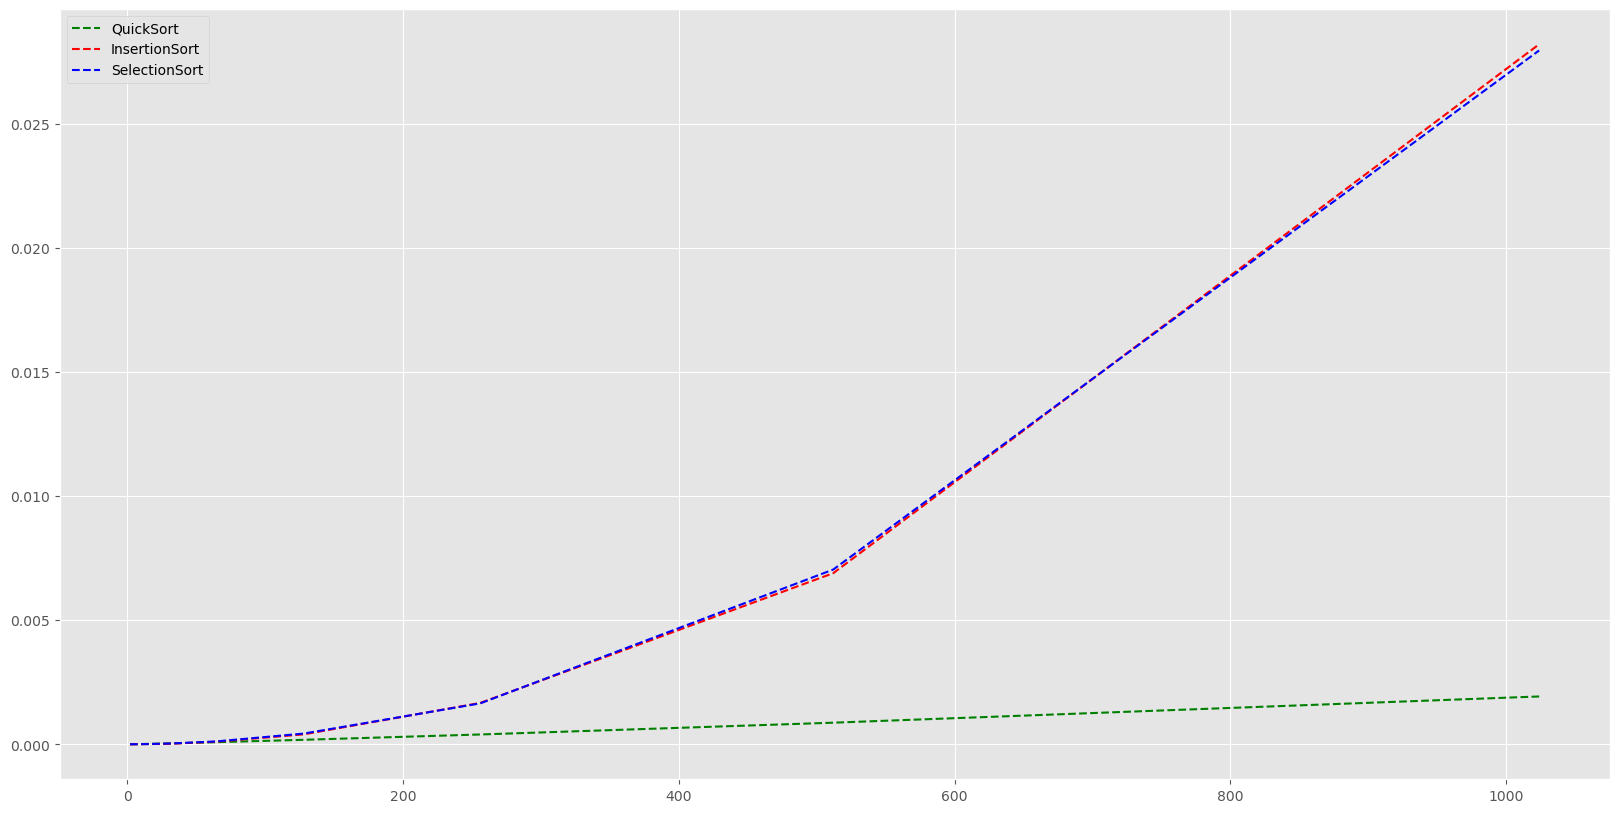

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lens, qs_t, "g--", label="QuickSort")
ax.plot(lens, is_t, "r--", label="InsertionSort")
ax.plot(lens, ss_t, "b--", label="SelectionSort")

_ = ax.legend(loc="best")

## Merge Sort
Merge Sort is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a **stable sort**, which means that the order of equal elements is the same in the input and output. 

Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.

Below a running example.

![alt text](mergesort_figure.png "Title")

### Exercise: Merge Sort
Complete the implementation of Merge Sort by implementing function ```merge()```.

In [11]:
## Your implementation here!!!

def merge(A,l,m,r):
    B = []
    LA = A[l:m+1]
    RA = A[(m+1):(r+1)]
    i=j=0
    k = l
    
    while i < len(LA) and j < len(RA): 
        if LA[i] <= RA[j]:
            A[k] = LA[i]
            i+=1
        else:
            A[k] = RA[j]
            j+=1
        k += 1
    
    while i < len(LA): # copy and sort of the remaining elements in the left array
        A[k] = LA[i]
        i += 1
        k += 1

    while j < len(RA): # copy and sort of the remaining elements in the right array
        A[k] = RA[j]
        j += 1
        k += 1

In [12]:
def mergeSort_rec(A, l, r): 
    
    if l < r:       
        m = (l+(r-1))//2  # Same as (l+r)//2, but avoids overflow for large l and h 
    
        # Sort first and second halves 
        mergeSort_rec(A, l, m) 
        mergeSort_rec(A, m+1, r) 
        merge(A, l, m, r)

In [13]:
def mergeSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    mergeSort_rec(A, 0, len(A)-1)
    return A

In [14]:
test_sorting_algorithm(mergeSort)

AssertionError: FAIL!

In [10]:
A = get_random_array(100)

In [64]:
%timeit quickSort(A)

24.3 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%timeit mergeSort(A)

33.1 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
